In [92]:
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error, median_absolute_error
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# загрузка данных
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# разделение на признаки и целевую переменную
X = data
y = target

# разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# стандартизация признаков
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# количество признаков для моделей
n_features = X.shape[1]
print(f"Количество признаков: {n_features}")

Количество признаков: 13


In [93]:
# обучение линейной регрессионной модели
reg = LinearRegression().fit(X_train_scaled, y_train)

In [94]:
# использование построенной модели для прогнозирования
y_test_linear_predict = reg.predict(X_test_scaled)

In [95]:
# словарь для сохранения метрик
metrics = {}
metrics['Linear Model'] = {
    'MSE': mean_squared_error(y_test_linear_predict, y_test),
    'MAE': mean_absolute_error(y_test_linear_predict, y_test),
    'MAPE': mean_absolute_percentage_error(y_test_linear_predict, y_test),
    'MAD': median_absolute_error(y_test_linear_predict, y_test),
    'R^2': r2_score(y_test_linear_predict, y_test)
}

In [96]:
# объект полиномиального преобразования исходной выборки
poly = PolynomialFeatures(degree=2)

In [97]:
# преобразуем тренировочные данные
X_poly = poly.fit_transform(X_train_scaled)

In [98]:
# создаем модель линейной регрессии
model = LinearRegression()

In [99]:
# обучаем ее
model.fit(X_poly, y_train)

LinearRegression()

In [100]:
# используем обученную модель для прогнозирования
y_test_polynomial_predict = model.predict(poly.transform(X_test_scaled))

In [101]:
# добавляем метрики в словарь
metrics['PolynomialModel'] = {
    'MSE': mean_squared_error(y_test_polynomial_predict, y_test),
    'MAE': mean_absolute_error(y_test_polynomial_predict, y_test),
    'MAPE': mean_absolute_percentage_error(y_test_polynomial_predict, y_test),
    'MAD': median_absolute_error(y_test_polynomial_predict, y_test),
    'R^2': r2_score(y_test_polynomial_predict, y_test)
}

                       MSE       MAE      MAPE       MAD       R^2
Linear Model     24.291119  3.189092  1.248556  2.324332  0.633325
PolynomialModel  14.257338  2.574836  0.135305  1.992027  0.792030


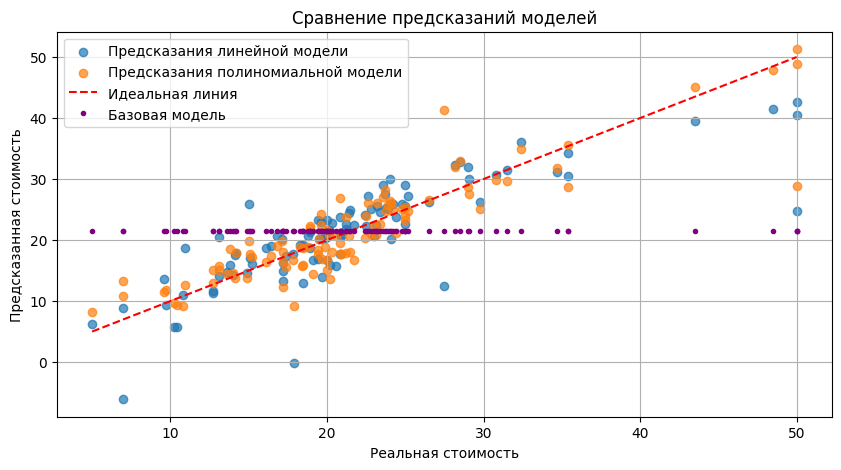

In [102]:
# Вывод результатов в виде таблицы
results_df = pd.DataFrame(metrics).T
print(results_df)

# Визуализация результатов
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_test_linear_predict, alpha=0.7, label='Предсказания линейной модели')
plt.scatter(y_test, y_test_polynomial_predict, alpha=0.7, label='Предсказания полиномиальной модели')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', label='Идеальная линия')
plt.plot(y_test, [y_test.mean()]*len(y_test), '.', label='Базовая модель', color="purple")
plt.xlabel('Реальная стоимость')
plt.ylabel('Предсказанная стоимость')
plt.title('Сравнение предсказаний моделей')
plt.legend()
plt.grid(True)
plt.show()